# KNN - Correntes de motor

Testando 30 rodadas com algoritmo **KNN** nos conjuntos de dados de correntes de motor com dados extraídos por _dwt_.

## Importando Bibliotecas

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from random import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score

## Função `test_30_knn`

Executa 30 rodadas com KNN, imprimindo o resultado da classificação e plotando a matriz de confusão.

Ao final, retorna 3 listas, contendo a **acurácia**, a **sensibilidade** e a **matriz de confusão** (não normalizada) ao longo das 30 rodadas.

In [3]:
def test_30_knn(x, y, y_labels, k_vizinhos):
    # Armazena os resultados de acurácia, sensibilidade e matriz de confusão que ao final serão retornados
    irisAcc = []
    irisRec = []
    matrixProdada = []
    matrixProdadaNormalizada = []

    # Armazena as sementes já usadas para não haver repetição
    usedSeed = []

    for i in range(30):

        # Gerando inteiro aleatório para distribuição dos dados
        semente = randint(0, 8001)
        
        while semente in usedSeed:
            semente = randint(0, 8001)
        
        usedSeed.append(semente)

        # Separando dados para treino e teste
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=semente)

        # Instanciando classificador
        classifier = KNeighborsClassifier(n_neighbors=k_vizinhos)

        # Treinando modelo
        classifier.fit(X_train, y_train)

        # Realizando teste de classificação
        y_pred = classifier.predict(X_test)

        # Adicionando resultados à lista
        acc = accuracy_score(y_test, y_pred)
        irisAcc.append(acc)

        rec = recall_score(y_test, y_pred, average=None)
        irisRec.append(rec)

        matrixProdada.append(confusion_matrix(y_test, y_pred, normalize=None))
        matrixProdadaNormalizada.append(confusion_matrix(y_test, y_pred, normalize='true'))

        # Exibindo resultados da rodada
        print(f"\n- RODADA {i} - Semente {semente} -\n")
        print("- Acurácia {accuracy} -\n- Sensibilidade {recall} -\n".format(accuracy=acc, recall=rec))

        print(classification_report(y_test, y_pred, target_names=y_labels))

        print("Matriz de confusão normalizada")
        plot_confusion_matrix(
            estimator=classifier,
            X=X_test,
            y_true=y_test,
            display_labels=y_labels,
            cmap=plt.cm.Blues,
            normalize='true'
        )
        plt.show()
    return irisAcc, irisRec, matrixProdadaNormalizada, matrixProdada

## Carregando dados e rótulos, e gerando _DataFrame_

In [4]:
def load_correntes():
    return np.append(
    arr=np.load("corrente1.npy"),
    values=np.append(np.load("corrente2.npy"), np.load("corrente3.npy"), 0),
    axis=0)

# Carregando data
data = load_correntes()

# Carregando Rótulos
labels = [
    'DesvioD1','DesvioD2','DesvioD3','DesvioD4','DesvioD5','DesvioA5',
    'MeanAD1','MeanAD2','MeanAD3','MeanAD4','MeanAD5','MeanADA5',
    'MedianAD1','MedianAD2','MedianAD3','MedianAD4','MedianAD5','MedianADA5',
    'KurtosisD1','KurtosisD2','KurtosisD3','KurtosisD4','KurtosisD5','KurtosisA5',
    'SkewnessD1','SkewnessD2','SkewnessD3','SkewnessD4','SkewnessD5','SkewnessA5',
    'EnergiaD1','EnergiaD2','EnergiaD3','EnergiaD4','EnergiaD5','EnergiaA5',
    'frequencia','classe','carga'
]

target_labels = ['Normal', 'HI-1', 'HI-2', 'HI-3', 'LI-1', 'LI-2', 'LI-3']

# Gerando DataFrame
chain_with_target = pd.DataFrame(data=data, columns=labels).fillna(value=0)

chainDF = chain_with_target.copy()

targetS = chainDF.pop('classe') # Removeu a coluna 'classe' de chainDF

## `chainDF`

`chainDF` é um _DataFrame_, uma tabela com os dados carregados

In [5]:
chainDF.shape

(7851, 38)

In [6]:
chainDF.sample(3)

,DesvioD1,DesvioD2,DesvioD3,DesvioD4,DesvioD5,DesvioA5,MeanAD1,MeanAD2,MeanAD3,MeanAD4,...,SkewnessD5,SkewnessA5,EnergiaD1,EnergiaD2,EnergiaD3,EnergiaD4,EnergiaD5,EnergiaA5,frequencia,carga
3423,0.011235,0.012692,0.016799,0.055491,0.252259,4.292689,0.008924,0.010135,0.013527,0.047904,...,-0.008849,-0.000848,0.000109,0.000070,0.000061,0.000333,0.003443,0.997124,35.0,100.0
5691,0.011192,0.012173,0.012997,0.028720,0.138855,2.565633,0.008918,0.009691,0.010410,0.024250,...,0.011605,0.005179,0.000303,0.000179,0.000102,0.000250,0.002920,0.996865,35.0,0.0
836,0.011076,0.012046,0.012923,0.028420,0.134987,2.474210,0.008843,0.009579,0.010332,0.024106,...,0.039500,0.013905,0.000319,0.000189,0.000109,0.000263,0.002966,0.996289,35.0,0.0


## Características dos dados

| Características     |  Valor|
|:--------------------|------:|
| Classes             |      7|
| Amostras            |   7851|
| Dimensionalidade    |     38|

In [7]:
chainDF.describe()

,DesvioD1,DesvioD2,DesvioD3,DesvioD4,DesvioD5,DesvioA5,MeanAD1,MeanAD2,MeanAD3,MeanAD4,...,SkewnessD5,SkewnessA5,EnergiaD1,EnergiaD2,EnergiaD3,EnergiaD4,EnergiaD5,EnergiaA5,frequencia,carga
count,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,...,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000
mean,0.011659,0.013451,0.017627,0.063597,0.310475,3.312243,0.009272,0.010695,0.014307,0.054659,...,0.012761,0.002218,0.000224,0.000147,0.000119,0.000808,0.009898,0.984748,45.091708,49.694306
std,0.001102,0.001709,0.004701,0.030260,0.148925,0.809602,0.000859,0.001334,0.004020,0.025998,...,0.053906,0.011577,0.000092,0.000059,0.000044,0.000560,0.007119,0.068205,9.991614,40.795070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.336391,-0.068359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000
25%,0.011175,0.012369,0.014061,0.040414,0.192664,2.556062,0.008899,0.009862,0.011258,0.034660,...,-0.010139,-0.003327,0.000131,0.000098,0.000085,0.000333,0.003474,0.982502,35.000000,0.000000
50%,0.011460,0.013052,0.016503,0.057861,0.282100,3.069992,0.009123,0.010388,0.013320,0.049756,...,0.012831,0.004095,0.000220,0.000142,0.000111,0.000634,0.007886,0.991570,45.000000,50.000000
75%,0.012027,0.014401,0.019949,0.080548,0.396623,4.180307,0.009574,0.011450,0.016239,0.069357,...,0.035000,0.008388,0.000303,0.000187,0.000149,0.001255,0.016329,0.996287,55.000000,100.000000
max,0.018549,0.020684,0.036409,0.172226,0.832394,5.370829,0.011858,0.015411,0.031664,0.150451,...,0.339453,0.054295,0.000553,0.000413,0.000277,0.002222,0.025331,0.999192,60.000000,100.000000


## `targetS`

`targetS` é apenas o que seria uma coluna, o que é chamado de _series_.

In [8]:
targetS.sample(3)

3463    2.0
4089    3.0
6909    4.0
Name: classe, dtype: float64

## Observando distribuição de classes

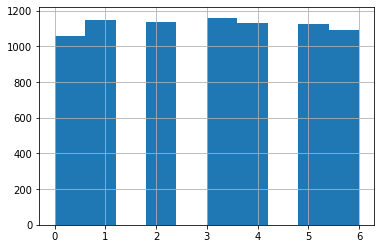

In [9]:
targetS.hist()

In [10]:
chain_with_target.groupby('classe').count()['carga']

classe
0.0    1059
1.0    1146
2.0    1137
3.0    1161
4.0    1131
5.0    1125
6.0    1092
Name: carga, dtype: int64

## Realizando 30 rodadas de Teste com KNN


- RODADA 0 - Semente 7357 -

- Acurácia 0.7181663837011885 -
- Sensibilidade [0.70886076 0.58855586 0.6941896  0.80869565 0.55214724 0.77192982
 0.90690691] -

              precision    recall  f1-score   support

      Normal       0.68      0.71      0.69       316
        HI-1       0.55      0.59      0.57       367
        HI-2       0.67      0.69      0.68       327
        HI-3       0.79      0.81      0.80       345
        LI-1       0.57      0.55      0.56       326
        LI-2       0.85      0.77      0.81       342
        LI-3       0.96      0.91      0.93       333

    accuracy                           0.72      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


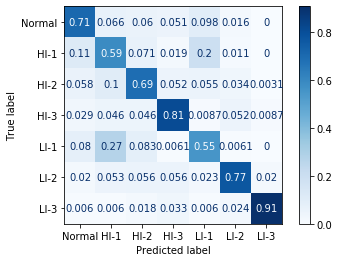


- RODADA 1 - Semente 7437 -

- Acurácia 0.7122241086587436 -
- Sensibilidade [0.73633441 0.55524079 0.67246377 0.82477341 0.51575931 0.79012346
 0.90962099] -

              precision    recall  f1-score   support

      Normal       0.67      0.74      0.70       311
        HI-1       0.51      0.56      0.53       353
        HI-2       0.69      0.67      0.68       345
        HI-3       0.79      0.82      0.81       331
        LI-1       0.56      0.52      0.54       349
        LI-2       0.84      0.79      0.81       324
        LI-3       0.97      0.91      0.94       343

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.72      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


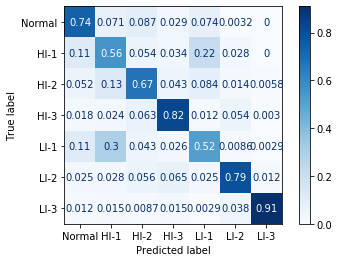


- RODADA 2 - Semente 3773 -

- Acurácia 0.717741935483871 -
- Sensibilidade [0.73770492 0.54768392 0.71388102 0.81875    0.54202899 0.76696165
 0.92966361] -

              precision    recall  f1-score   support

      Normal       0.66      0.74      0.70       305
        HI-1       0.52      0.55      0.53       367
        HI-2       0.72      0.71      0.72       353
        HI-3       0.80      0.82      0.81       320
        LI-1       0.55      0.54      0.55       345
        LI-2       0.85      0.77      0.81       339
        LI-3       0.98      0.93      0.95       327

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


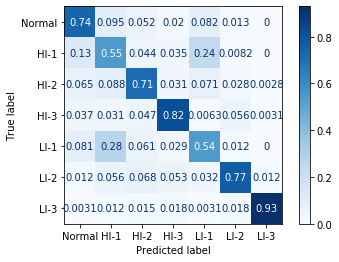


- RODADA 3 - Semente 2164 -

- Acurácia 0.7096774193548387 -
- Sensibilidade [0.74107143 0.56470588 0.66193182 0.77556818 0.55649718 0.7694704
 0.93355482] -

              precision    recall  f1-score   support

      Normal       0.67      0.74      0.70       336
        HI-1       0.50      0.56      0.53       340
        HI-2       0.68      0.66      0.67       352
        HI-3       0.85      0.78      0.81       352
        LI-1       0.59      0.56      0.57       354
        LI-2       0.79      0.77      0.78       321
        LI-3       0.98      0.93      0.96       301

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.72      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


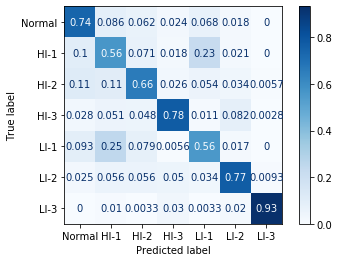


- RODADA 4 - Semente 918 -

- Acurácia 0.7033106960950763 -
- Sensibilidade [0.72063492 0.53571429 0.67551622 0.77101449 0.52996845 0.75903614
 0.93023256] -

              precision    recall  f1-score   support

      Normal       0.69      0.72      0.71       315
        HI-1       0.52      0.54      0.53       364
        HI-2       0.68      0.68      0.68       339
        HI-3       0.78      0.77      0.78       345
        LI-1       0.51      0.53      0.52       317
        LI-2       0.79      0.76      0.77       332
        LI-3       0.98      0.93      0.95       344

    accuracy                           0.70      2356
   macro avg       0.71      0.70      0.70      2356
weighted avg       0.71      0.70      0.71      2356

Matriz de confusão normalizada


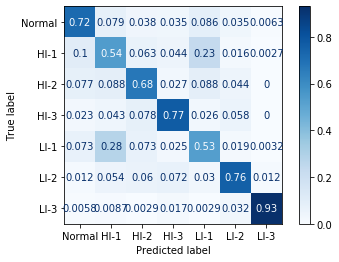


- RODADA 5 - Semente 3407 -

- Acurácia 0.7156196943972836 -
- Sensibilidade [0.76489028 0.59567901 0.6858006  0.78915663 0.49447514 0.7675841
 0.91412742] -

              precision    recall  f1-score   support

      Normal       0.67      0.76      0.71       319
        HI-1       0.47      0.60      0.53       324
        HI-2       0.71      0.69      0.70       331
        HI-3       0.76      0.79      0.77       332
        LI-1       0.66      0.49      0.57       362
        LI-2       0.81      0.77      0.79       327
        LI-3       0.98      0.91      0.95       361

    accuracy                           0.72      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


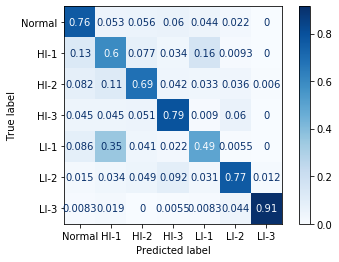


- RODADA 6 - Semente 2961 -

- Acurácia 0.7139219015280136 -
- Sensibilidade [0.74143302 0.60534125 0.68313953 0.73293769 0.50140056 0.82058824
 0.9375    ] -

              precision    recall  f1-score   support

      Normal       0.67      0.74      0.71       321
        HI-1       0.48      0.61      0.53       337
        HI-2       0.73      0.68      0.70       344
        HI-3       0.78      0.73      0.76       337
        LI-1       0.59      0.50      0.54       357
        LI-2       0.84      0.82      0.83       340
        LI-3       0.99      0.94      0.96       320

    accuracy                           0.71      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.72      0.71      0.72      2356

Matriz de confusão normalizada


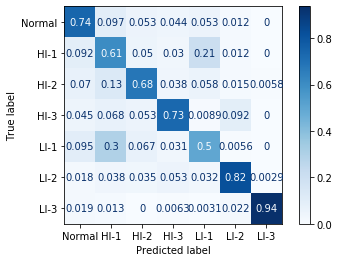


- RODADA 7 - Semente 390 -

- Acurácia 0.7275042444821732 -
- Sensibilidade [0.73333333 0.57668712 0.68571429 0.81402439 0.56534954 0.76261128
 0.93820225] -

              precision    recall  f1-score   support

      Normal       0.70      0.73      0.72       330
        HI-1       0.51      0.58      0.54       326
        HI-2       0.71      0.69      0.70       350
        HI-3       0.81      0.81      0.81       328
        LI-1       0.59      0.57      0.58       329
        LI-2       0.83      0.76      0.80       337
        LI-3       0.96      0.94      0.95       356

    accuracy                           0.73      2356
   macro avg       0.73      0.73      0.73      2356
weighted avg       0.73      0.73      0.73      2356

Matriz de confusão normalizada


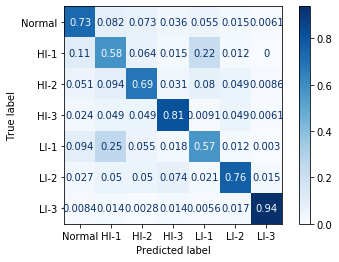


- RODADA 8 - Semente 216 -

- Acurácia 0.7126485568760611 -
- Sensibilidade [0.72666667 0.57863501 0.67130919 0.80351906 0.55263158 0.73901099
 0.93610224] -

              precision    recall  f1-score   support

      Normal       0.68      0.73      0.70       300
        HI-1       0.52      0.58      0.55       337
        HI-2       0.68      0.67      0.68       359
        HI-3       0.81      0.80      0.81       341
        LI-1       0.54      0.55      0.55       342
        LI-2       0.85      0.74      0.79       364
        LI-3       0.96      0.94      0.95       313

    accuracy                           0.71      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.71      0.72      2356

Matriz de confusão normalizada


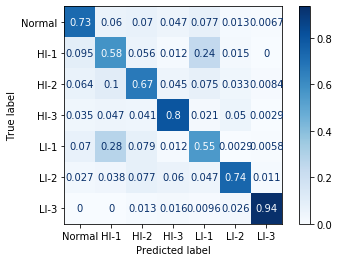


- RODADA 9 - Semente 986 -

- Acurácia 0.7122241086587436 -
- Sensibilidade [0.6910828  0.5758427  0.71343284 0.75438596 0.5339233  0.77708978
 0.94236311] -

              precision    recall  f1-score   support

      Normal       0.65      0.69      0.67       314
        HI-1       0.53      0.58      0.55       356
        HI-2       0.69      0.71      0.70       335
        HI-3       0.82      0.75      0.79       342
        LI-1       0.57      0.53      0.55       339
        LI-2       0.79      0.78      0.79       323
        LI-3       0.98      0.94      0.96       347

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.71      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


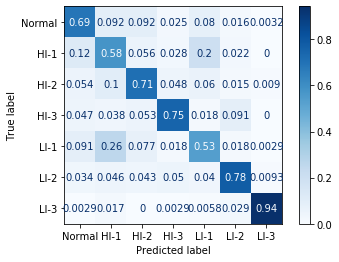


- RODADA 10 - Semente 7779 -

- Acurácia 0.7092529711375212 -
- Sensibilidade [0.69905956 0.56145251 0.71666667 0.72537313 0.5542522  0.77955272
 0.94848485] -

              precision    recall  f1-score   support

      Normal       0.65      0.70      0.67       319
        HI-1       0.52      0.56      0.54       358
        HI-2       0.72      0.72      0.72       360
        HI-3       0.81      0.73      0.77       335
        LI-1       0.57      0.55      0.56       341
        LI-2       0.76      0.78      0.77       313
        LI-3       0.98      0.95      0.96       330

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.71      2356
weighted avg       0.71      0.71      0.71      2356

Matriz de confusão normalizada


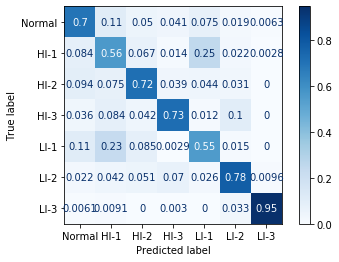


- RODADA 11 - Semente 869 -

- Acurácia 0.735144312393888 -
- Sensibilidade [0.73731343 0.6180758  0.71253823 0.77647059 0.55131965 0.79591837
 0.96330275] -

              precision    recall  f1-score   support

      Normal       0.74      0.74      0.74       335
        HI-1       0.53      0.62      0.57       343
        HI-2       0.70      0.71      0.70       327
        HI-3       0.84      0.78      0.80       340
        LI-1       0.61      0.55      0.58       341
        LI-2       0.81      0.80      0.81       343
        LI-3       0.96      0.96      0.96       327

    accuracy                           0.74      2356
   macro avg       0.74      0.74      0.74      2356
weighted avg       0.74      0.74      0.74      2356

Matriz de confusão normalizada


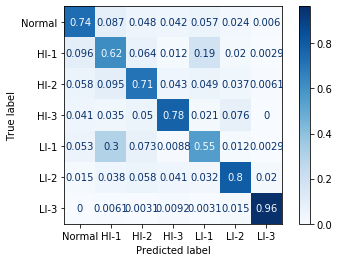


- RODADA 12 - Semente 2414 -

- Acurácia 0.7249575551782682 -
- Sensibilidade [0.73313783 0.5988024  0.69161677 0.77207977 0.56       0.79816514
 0.93730408] -

              precision    recall  f1-score   support

      Normal       0.70      0.73      0.72       341
        HI-1       0.50      0.60      0.54       334
        HI-2       0.71      0.69      0.70       334
        HI-3       0.83      0.77      0.80       351
        LI-1       0.59      0.56      0.58       350
        LI-2       0.83      0.80      0.81       327
        LI-3       0.99      0.94      0.96       319

    accuracy                           0.72      2356
   macro avg       0.74      0.73      0.73      2356
weighted avg       0.73      0.72      0.73      2356

Matriz de confusão normalizada


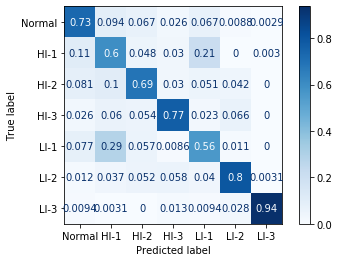


- RODADA 13 - Semente 7080 -

- Acurácia 0.715195246179966 -
- Sensibilidade [0.7202381  0.62006079 0.68562874 0.78470255 0.51260504 0.76687117
 0.93457944] -

              precision    recall  f1-score   support

      Normal       0.71      0.72      0.71       336
        HI-1       0.50      0.62      0.55       329
        HI-2       0.68      0.69      0.68       334
        HI-3       0.80      0.78      0.79       353
        LI-1       0.61      0.51      0.56       357
        LI-2       0.80      0.77      0.78       326
        LI-3       0.98      0.93      0.96       321

    accuracy                           0.72      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


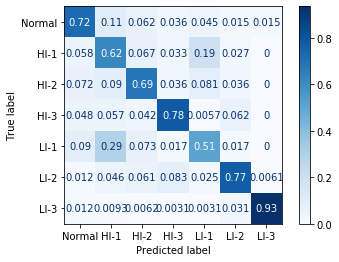


- RODADA 14 - Semente 5217 -

- Acurácia 0.7368421052631579 -
- Sensibilidade [0.77022654 0.59883721 0.69090909 0.7459893  0.57738095 0.83486239
 0.94642857] -

              precision    recall  f1-score   support

      Normal       0.70      0.77      0.73       309
        HI-1       0.57      0.60      0.58       344
        HI-2       0.70      0.69      0.70       330
        HI-3       0.86      0.75      0.80       374
        LI-1       0.58      0.58      0.58       336
        LI-2       0.79      0.83      0.81       327
        LI-3       0.98      0.95      0.96       336

    accuracy                           0.74      2356
   macro avg       0.74      0.74      0.74      2356
weighted avg       0.74      0.74      0.74      2356

Matriz de confusão normalizada


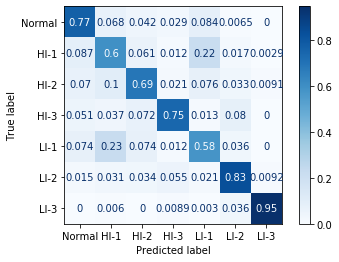


- RODADA 15 - Semente 2060 -

- Acurácia 0.7215619694397284 -
- Sensibilidade [0.74303406 0.56267409 0.67528736 0.8        0.5761194  0.77616279
 0.94788274] -

              precision    recall  f1-score   support

      Normal       0.72      0.74      0.73       323
        HI-1       0.51      0.56      0.53       359
        HI-2       0.69      0.68      0.68       348
        HI-3       0.80      0.80      0.80       340
        LI-1       0.58      0.58      0.58       335
        LI-2       0.85      0.78      0.81       344
        LI-3       0.97      0.95      0.96       307

    accuracy                           0.72      2356
   macro avg       0.73      0.73      0.73      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


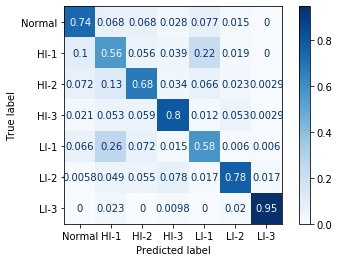


- RODADA 16 - Semente 6200 -

- Acurácia 0.7241086587436333 -
- Sensibilidade [0.67701863 0.584375   0.74052478 0.83142857 0.51685393 0.77987421
 0.93371758] -

              precision    recall  f1-score   support

      Normal       0.71      0.68      0.69       322
        HI-1       0.49      0.58      0.53       320
        HI-2       0.71      0.74      0.72       343
        HI-3       0.80      0.83      0.82       350
        LI-1       0.60      0.52      0.56       356
        LI-2       0.83      0.78      0.80       318
        LI-3       0.96      0.93      0.95       347

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.73      0.72      0.73      2356

Matriz de confusão normalizada


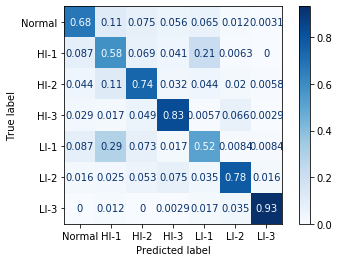


- RODADA 17 - Semente 6250 -

- Acurácia 0.7241086587436333 -
- Sensibilidade [0.74041298 0.59580838 0.66096866 0.77030812 0.52507375 0.82692308
 0.96604938] -

              precision    recall  f1-score   support

      Normal       0.71      0.74      0.73       339
        HI-1       0.48      0.60      0.53       334
        HI-2       0.71      0.66      0.69       351
        HI-3       0.85      0.77      0.81       357
        LI-1       0.59      0.53      0.55       339
        LI-2       0.82      0.83      0.82       312
        LI-3       0.97      0.97      0.97       324

    accuracy                           0.72      2356
   macro avg       0.73      0.73      0.73      2356
weighted avg       0.73      0.72      0.73      2356

Matriz de confusão normalizada


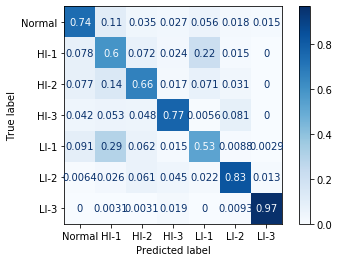


- RODADA 18 - Semente 1947 -

- Acurácia 0.7126485568760611 -
- Sensibilidade [0.73684211 0.56764706 0.68838527 0.75988701 0.54005935 0.77419355
 0.94155844] -

              precision    recall  f1-score   support

      Normal       0.67      0.74      0.70       323
        HI-1       0.50      0.57      0.53       340
        HI-2       0.69      0.69      0.69       353
        HI-3       0.82      0.76      0.79       354
        LI-1       0.56      0.54      0.55       337
        LI-2       0.84      0.77      0.81       341
        LI-3       0.97      0.94      0.95       308

    accuracy                           0.71      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.71      0.72      2356

Matriz de confusão normalizada


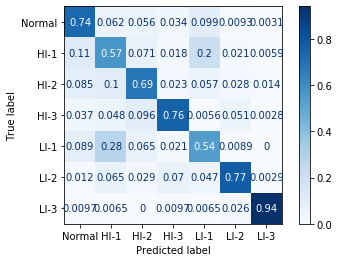


- RODADA 19 - Semente 6658 -

- Acurácia 0.7330220713073005 -
- Sensibilidade [0.74342105 0.5840708  0.71590909 0.8115942  0.56083086 0.76470588
 0.94985251] -

              precision    recall  f1-score   support

      Normal       0.68      0.74      0.71       304
        HI-1       0.53      0.58      0.55       339
        HI-2       0.71      0.72      0.71       352
        HI-3       0.79      0.81      0.80       345
        LI-1       0.62      0.56      0.59       337
        LI-2       0.86      0.76      0.81       340
        LI-3       0.98      0.95      0.96       339

    accuracy                           0.73      2356
   macro avg       0.74      0.73      0.73      2356
weighted avg       0.74      0.73      0.73      2356

Matriz de confusão normalizada


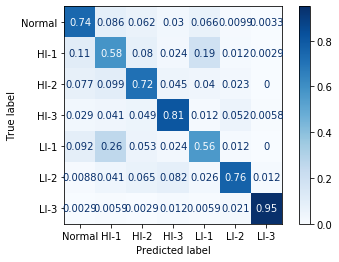


- RODADA 20 - Semente 995 -

- Acurácia 0.7215619694397284 -
- Sensibilidade [0.71299094 0.57909605 0.72434018 0.78994083 0.52409639 0.7673716
 0.96352584] -

              precision    recall  f1-score   support

      Normal       0.69      0.71      0.70       331
        HI-1       0.53      0.58      0.55       354
        HI-2       0.73      0.72      0.73       341
        HI-3       0.77      0.79      0.78       338
        LI-1       0.57      0.52      0.55       332
        LI-2       0.82      0.77      0.79       331
        LI-3       0.96      0.96      0.96       329

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


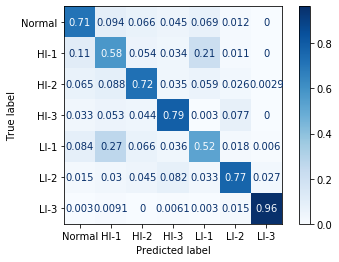


- RODADA 21 - Semente 4278 -

- Acurácia 0.7075551782682513 -
- Sensibilidade [0.70897833 0.60176991 0.63313609 0.7754491  0.50837989 0.7788162
 0.95918367] -

              precision    recall  f1-score   support

      Normal       0.71      0.71      0.71       323
        HI-1       0.48      0.60      0.54       339
        HI-2       0.71      0.63      0.67       338
        HI-3       0.80      0.78      0.79       334
        LI-1       0.53      0.51      0.52       358
        LI-2       0.82      0.78      0.80       321
        LI-3       0.98      0.96      0.97       343

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.71      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


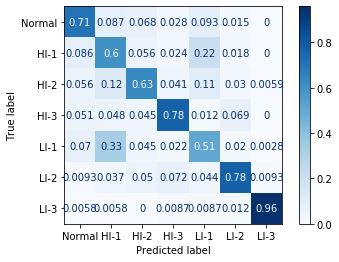


- RODADA 22 - Semente 6510 -

- Acurácia 0.7156196943972836 -
- Sensibilidade [0.69781931 0.57627119 0.71473354 0.75216138 0.53142857 0.81065089
 0.94495413] -

              precision    recall  f1-score   support

      Normal       0.67      0.70      0.69       321
        HI-1       0.53      0.58      0.55       354
        HI-2       0.65      0.71      0.68       319
        HI-3       0.81      0.75      0.78       347
        LI-1       0.60      0.53      0.56       350
        LI-2       0.81      0.81      0.81       338
        LI-3       0.98      0.94      0.96       327

    accuracy                           0.72      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


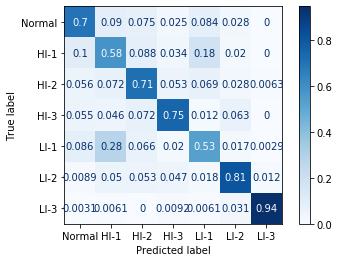


- RODADA 23 - Semente 7554 -

- Acurácia 0.719439728353141 -
- Sensibilidade [0.69936709 0.58263305 0.70903955 0.77083333 0.54705882 0.8117284
 0.9331307 ] -

              precision    recall  f1-score   support

      Normal       0.69      0.70      0.69       316
        HI-1       0.51      0.58      0.54       357
        HI-2       0.72      0.71      0.71       354
        HI-3       0.79      0.77      0.78       336
        LI-1       0.59      0.55      0.57       340
        LI-2       0.82      0.81      0.82       324
        LI-3       0.98      0.93      0.95       329

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


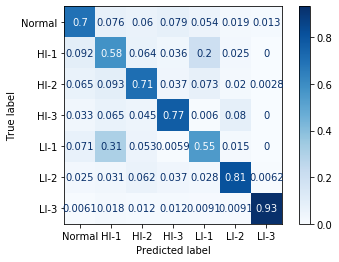


- RODADA 24 - Semente 6962 -

- Acurácia 0.7101018675721562 -
- Sensibilidade [0.68661972 0.52762431 0.67073171 0.78474114 0.54929577 0.82420749
 0.95207668] -

              precision    recall  f1-score   support

      Normal       0.64      0.69      0.66       284
        HI-1       0.52      0.53      0.52       362
        HI-2       0.69      0.67      0.68       328
        HI-3       0.81      0.78      0.80       367
        LI-1       0.58      0.55      0.56       355
        LI-2       0.81      0.82      0.82       347
        LI-3       0.95      0.95      0.95       313

    accuracy                           0.71      2356
   macro avg       0.71      0.71      0.71      2356
weighted avg       0.71      0.71      0.71      2356

Matriz de confusão normalizada


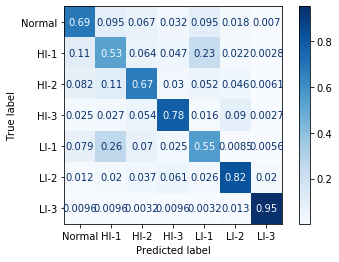


- RODADA 25 - Semente 7 -

- Acurácia 0.7011884550084889 -
- Sensibilidade [0.68209877 0.60404624 0.66477273 0.78386167 0.50410959 0.80065359
 0.90822785] -

              precision    recall  f1-score   support

      Normal       0.66      0.68      0.67       324
        HI-1       0.50      0.60      0.55       346
        HI-2       0.67      0.66      0.67       352
        HI-3       0.80      0.78      0.79       347
        LI-1       0.60      0.50      0.55       365
        LI-2       0.77      0.80      0.78       306
        LI-3       0.98      0.91      0.94       316

    accuracy                           0.70      2356
   macro avg       0.71      0.71      0.71      2356
weighted avg       0.71      0.70      0.70      2356

Matriz de confusão normalizada


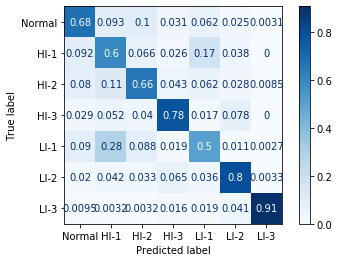


- RODADA 26 - Semente 1765 -

- Acurácia 0.7041595925297114 -
- Sensibilidade [0.73548387 0.5488959  0.66011236 0.7965616  0.52112676 0.74857143
 0.93103448] -

              precision    recall  f1-score   support

      Normal       0.67      0.74      0.70       310
        HI-1       0.45      0.55      0.49       317
        HI-2       0.67      0.66      0.66       356
        HI-3       0.80      0.80      0.80       349
        LI-1       0.58      0.52      0.55       355
        LI-2       0.84      0.75      0.79       350
        LI-3       0.98      0.93      0.95       319

    accuracy                           0.70      2356
   macro avg       0.71      0.71      0.71      2356
weighted avg       0.71      0.70      0.71      2356

Matriz de confusão normalizada


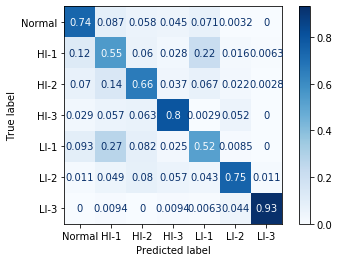


- RODADA 27 - Semente 5821 -

- Acurácia 0.7084040747028862 -
- Sensibilidade [0.7073955  0.56460674 0.68373494 0.77325581 0.53097345 0.7704918
 0.9512987 ] -

              precision    recall  f1-score   support

      Normal       0.66      0.71      0.68       311
        HI-1       0.51      0.56      0.54       356
        HI-2       0.70      0.68      0.69       332
        HI-3       0.79      0.77      0.78       344
        LI-1       0.55      0.53      0.54       339
        LI-2       0.83      0.77      0.80       366
        LI-3       0.97      0.95      0.96       308

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.71      2356
weighted avg       0.71      0.71      0.71      2356

Matriz de confusão normalizada


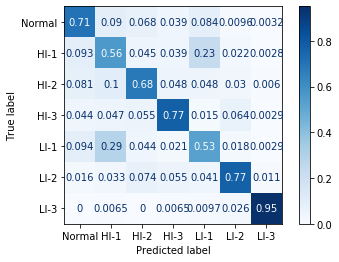


- RODADA 28 - Semente 7114 -

- Acurácia 0.7190152801358234 -
- Sensibilidade [0.72292994 0.57681941 0.70987654 0.77981651 0.54945055 0.77272727
 0.9601227 ] -

              precision    recall  f1-score   support

      Normal       0.70      0.72      0.71       314
        HI-1       0.54      0.58      0.56       371
        HI-2       0.69      0.71      0.70       324
        HI-3       0.79      0.78      0.78       327
        LI-1       0.58      0.55      0.56       364
        LI-2       0.85      0.77      0.81       330
        LI-3       0.96      0.96      0.96       326

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.73      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


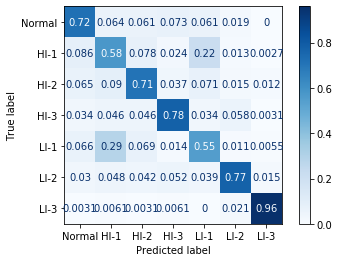


- RODADA 29 - Semente 1155 -

- Acurácia 0.7130730050933786 -
- Sensibilidade [0.70570571 0.56069364 0.696793   0.8150134  0.52552553 0.75522388
 0.9556314 ] -

              precision    recall  f1-score   support

      Normal       0.72      0.71      0.71       333
        HI-1       0.49      0.56      0.52       346
        HI-2       0.68      0.70      0.69       343
        HI-3       0.82      0.82      0.82       373
        LI-1       0.54      0.53      0.53       333
        LI-2       0.85      0.76      0.80       335
        LI-3       0.99      0.96      0.97       293

    accuracy                           0.71      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.72      0.71      0.72      2356

Matriz de confusão normalizada


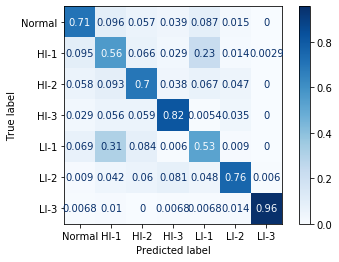

In [11]:
accuracy, recall, confusionNormalized, confusion = test_30_knn(x=chainDF.values, y=targetS.values, y_labels=target_labels, k_vizinhos=5)

## Gerando DataFrame de Acurácia e Sensibilidade por rodada

In [12]:
metricDF = pd.DataFrame(
    data=recall,
    columns=[f'S - {name}' for name in target_labels])

metricDF['Acurácia'] = accuracy
metricDF

,S - Normal,S - HI-1,S - HI-2,S - HI-3,S - LI-1,S - LI-2,S - LI-3,Acurácia
0,0.708861,0.588556,0.694190,0.808696,0.552147,0.771930,0.906907,0.718166
1,0.736334,0.555241,0.672464,0.824773,0.515759,0.790123,0.909621,0.712224
2,0.737705,0.547684,0.713881,0.818750,0.542029,0.766962,0.929664,0.717742
3,0.741071,0.564706,0.661932,0.775568,0.556497,0.769470,0.933555,0.709677
4,0.720635,0.535714,0.675516,0.771014,0.529968,0.759036,0.930233,0.703311
5,0.764890,0.595679,0.685801,0.789157,0.494475,0.767584,0.914127,0.715620
6,0.741433,0.605341,0.683140,0.732938,0.501401,0.820588,0.937500,0.713922
7,0.733333,0.576687,0.685714,0.814024,0.565350,0.762611,0.938202,0.727504
8,0.726667,0.578635,0.671309,0.803519,0.552632,0.739011,0.936102,0.712649
9,0.691083,0.575843,0.713433,0.754386,0.533923,0.777090,0.942363,0.712224


In [13]:
metricDF.describe()

,S - Normal,S - HI-1,S - HI-2,S - HI-3,S - LI-1,S - LI-2,S - LI-3,Acurácia
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.722070,0.577945,0.690103,0.783076,0.537004,0.782069,0.940221,0.716667
std,0.023389,0.022718,0.023613,0.026362,0.022056,0.024236,0.016123,0.008995
min,0.677019,0.527624,0.633136,0.725373,0.494475,0.739011,0.906907,0.701188
25%,0.706128,0.563157,0.673170,0.770879,0.521869,0.767064,0.933237,0.710632
50%,0.724798,0.577727,0.687093,0.781839,0.536991,0.775178,0.939880,0.715407
75%,0.737607,0.595776,0.711873,0.802639,0.552510,0.797603,0.950937,0.721562
max,0.770227,0.620061,0.740525,0.831429,0.577381,0.834862,0.966049,0.736842


## Gerando _DataFrame_ da matriz de confusão por rodada

In [14]:
confusion_resized = np.resize(confusion, (30, 49))

confusion_labels = [f"T {truelabel} x P {predlabel}" for truelabel in target_labels for predlabel in target_labels]

confusionTurnDF = pd.DataFrame(
    data=confusion_resized,
    columns=confusion_labels
)
# confusionTurnDF

## Matriz de confusão média

In [15]:
# Matriz com o somatório das 30 matrizes de confusão
confusion_sum = sum(confusion)

# Matriz com média aritmética das 30 marizes de confusão 
confusion_mean = [[x / 30 for x in line] for line in confusion_sum]

confusionDF = pd.DataFrame(
    data=confusion_mean,
    columns=[f'P - {label}' for label in target_labels],
    index=[f'True - {label}' for label in target_labels]
)

confusionDF

,P - Normal,P - HI-1,P - HI-2,P - HI-3,P - LI-1,P - LI-2,P - LI-3
True - Normal,230.733333,27.266667,20.166667,12.266667,23.000000,4.966667,1.100000
True - HI-1,34.600000,199.700000,21.900000,9.666667,73.466667,5.966667,0.466667
True - HI-2,23.900000,35.800000,235.833333,12.533333,21.833333,10.233333,1.666667
True - HI-3,12.066667,16.366667,18.600000,269.700000,4.200000,22.966667,0.566667
True - LI-1,28.766667,96.700000,23.100000,6.066667,184.966667,4.300000,0.766667
True - LI-2,5.500000,13.733333,17.900000,20.966667,10.700000,260.266667,3.866667
True - LI-3,1.666667,3.100000,1.100000,3.666667,1.866667,8.200000,307.266667


## Matriz de confusão média normalizada

In [16]:
# Matriz com o somatório das 30 matrizes de confusão
confusion_sum = sum(confusionNormalized)

# Matriz com média aritmética das 30 marizes de confusão 
confusion_mean = [[x / 30 for x in line] for line in confusion_sum]

confusionDF = pd.DataFrame(
    data=confusion_mean,
    columns=[f'P - {label}' for label in target_labels],
    index=[f'True - {label}' for label in target_labels]
)

confusionDF

,P - Normal,P - HI-1,P - HI-2,P - HI-3,P - LI-1,P - LI-2,P - LI-3
True - Normal,0.722070,0.085165,0.063171,0.038440,0.072227,0.015507,0.003419
True - HI-1,0.100006,0.577945,0.063381,0.027871,0.212253,0.017189,0.001355
True - HI-2,0.069804,0.104610,0.690103,0.036750,0.063851,0.029984,0.004898
True - HI-3,0.035014,0.047537,0.053841,0.783076,0.012226,0.066645,0.001661
True - LI-1,0.083403,0.280227,0.067060,0.017568,0.537004,0.012517,0.002221
True - LI-2,0.016552,0.041188,0.053547,0.063015,0.032067,0.782069,0.011560
True - LI-3,0.005083,0.009417,0.003359,0.011264,0.005696,0.024960,0.940221


## Gerando _DataFrame_ da matriz de confusão binarizada por rodada

In [17]:
def binarize(matriz7x7):
    mBinaria = [[0,0],
                [0,0]]
    for linha in range(len(matriz7x7)):
        if linha == 0:
            mBinaria[0] = [matriz7x7[0][0], sum(matriz7x7[0][1:])]
        else:
            mBinaria[1][0] += matriz7x7[linha][0]
            mBinaria[1][1] += sum(matriz7x7[linha][1:])
    return mBinaria
    
confusionBinary = [binarize(matrix) for matrix in confusion]

confusionBinarieDF = pd.DataFrame(
    data=np.resize(confusionBinary, (30, 4)),
    columns=['true positive', 'false negative','false positive', 'true negative']
)
# confusionBinarieDF

## Matriz de confusão binarizada média

In [21]:
confusionBinary = [binarize(matrix) for matrix in confusion]

# Matriz com o somatório das 30 matrizes de confusão
confusion_binary_sum = [[0, 0], [0, 0]]

for line in range(len(confusionBinary)):
    confusion_binary_sum[0][0] += confusionBinary[line][0][0]
    confusion_binary_sum[0][1] += confusionBinary[line][0][1]
    confusion_binary_sum[1][0] += confusionBinary[line][1][0]
    confusion_binary_sum[1][1] += confusionBinary[line][1][1]

# Matriz com média aritmética das 30 marizes de confusão 
confusion_binary_mean = [[x / 30 for x in line] for line in confusion_binary_sum]

confusionBDF = pd.DataFrame(
    data=confusion_binary_mean,
    columns=['Pred-Normal', 'Pred-Fail'],
    index=['True-Normal', 'True-Fail']
)

confusionBDF

,Pred-Normal,Pred-Fail
True-Normal,230.733333,88.766667
True-Fail,106.500000,1930.000000


## Matriz de confusão binarizada média normalizada

In [19]:
confusionBinaryNormalized = [binarize(matrix) for matrix in confusionNormalized]

# Matriz com o somatório das 30 matrizes de confusão
confusion_binary_normalized_sum = [[0, 0], [0, 0]]

for line in range(len(confusionBinaryNormalized)):
    confusion_binary_normalized_sum[0][0] += confusionBinaryNormalized[line][0][0]
    confusion_binary_normalized_sum[0][1] += confusionBinaryNormalized[line][0][1]
    confusion_binary_normalized_sum[1][0] += confusionBinaryNormalized[line][1][0]
    confusion_binary_normalized_sum[1][1] += confusionBinaryNormalized[line][1][1]

# Matriz com média aritmética das 30 marizes de confusão 
confusion_binary_normalized_mean = [[x / 30 for x in line] for line in confusion_binary_normalized_sum]

confusionBDF = pd.DataFrame(
    data=confusion_binary_normalized_mean,
    columns=['Pred-Normal', 'Pred-Fail'],
    index=['True-Normal', 'True-Fail']
)

confusionBDF

,Pred-Normal,Pred-Fail
True-Normal,0.722070,0.277930
True-Fail,0.309863,5.690137
